<a href="https://colab.research.google.com/github/remi-vidal/NLP-ensae/blob/main/notebook_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
<h1><center><strong><font color="chillipepper">Natural Language Processing - ENSAE 2022</font></strong></center></h1>
<h2><center><strong><font color="chillipepper">Poetry Analysis and Generation</font></strong></center></h2>

---

**Authors :** Louis AMRANI (louis.amrani@ensae.fr) and Rémi VIDAL (remi.vidal@ensae.fr)



Overview
...

# Imports and Installation

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/remi-vidal/NLP-ensae/main/df_cleaned.csv"
df = pd.read_csv(url, index_col=0)

In [124]:
df.head()

,title,author,content,theme,file_title
0,A Lonely Heart In A Thunderstorm,sylviaspencer,A lonely heart sets the table but is she a Mil...,lonely,LonelyPoemsALonelyHeartInAThunderstormPoembysy...
1,A Lonely Weekend,sylviaspencer,"How bright it is on a Friday, when I am away f...",lonely,LonelyPoemsALonelyWeekendPoembysylviaspencer.txt
2,Lonely In The Dark,nouriblack,I am living in the darkness\nI feel so scared\...,lonely,LonelyPoemsLonelyInTheDarkPoembynouriblack.txt
3,Lonely Burial,Stephen Vincent Benet,"There were not many at that lonely place,\nWhe...",lonely,LonelyPoemsLonelyBurialPoembyStephenVincentBen...
4,Filmscript For A Lonely Afternoon,Michael Shepherd,"walks into deserted playground\nindifferently,...",lonely,LonelyPoemsFilmscriptForALonelyAfternoonPoemby...


# Data Exploration

In [125]:
df.columns

Index(['title', 'author', 'content', 'theme', 'file_title'], dtype='object')

In [126]:
len(df)

14335

### Sanity check

In [127]:
#Empty cells
for column in df.columns :
    print(df[column].isna().sum())

0
1
0
0
0


In [128]:
# No NaN, except one author. Let's find it :
df[df['author'].isna()]

,title,author,content,theme,file_title
12757,F Silent Fire,NaN,Tell me which fight do you fight deep in you\n...,fire,FirePoemsFSilentFirePoemby.txt


$\longrightarrow$ The author was missing in the file name. Cannot retrieve it on internet (unknown author probably).

In [129]:
# Number of different poems in the database
for column in ['title', 'content', 'file_title'] :
    print(len(df[column].unique()))

11665
13737
14335


$\longrightarrow$ No duplicate files in our database, but some poems are affected to several themes. For example :

In [130]:
df[df['title']== 'The Sick Rose']

,title,author,content,theme,file_title
147,The Sick Rose,William Blake,"O Rose, thou art sick!\nThe invisible worm\nTh...",rose,RosePoemsTheSickRosePoembyWilliamBlake.txt
290,The Sick Rose,William Blake,"O Rose, thou art sick!\nThe invisible worm\nTh...",sick,SickPoemsTheSickRosePoembyWilliamBlake.txt


Moreover, some contents have several titles :

In [131]:
df[df['content'] == (df[df['title'] == 'Personal Identity']['content'].values[0])]

,title,author,content,theme,file_title
842,Personal Identity As,Hasmukh Amathalal,Personal identity\nWomen always need attention...,identity,IdentityPoemsPersonalIdentityAsPoembyHasmukhAm...
895,Personal Identity,Hasmukh Amathalal,Personal identity\nWomen always need attention...,identity,IdentityPoemsPersonalIdentityPoembyHasmukhAmat...


### Themes

In [132]:
print("There are {} different themes in the database :".format(len(df['theme'].unique())))
df['theme'].unique()

There are 144 different themes in the database :


array(['lonely', 'rose', 'sick', 'carpe diem', 'hope', 'home', 'sorrow',
       'future', 'identity', 'passion', 'girl', 'butterfly', 'childhood',
       'memory', 'poem', 'sea', 'greed', 'baby', 'red', 'rainbow',
       'beauty', 'green', 'travel', 'power', 'family', 'evil', 'fear',
       'dark', 'dream', 'soldier', 'beautiful', 'city', 'laughter',
       'lost', 'spring', 'nature', 'sky', 'work', 'june', 'world',
       'racism', 'courage', 'faith', 'chicago', 'justice', 'school',
       'warning', 'happy', 'football', 'death', 'wedding', 'friend',
       'animal', 'culture', 'truth', 'trust', 'silver', 'heaven',
       'poetry', 'birth', 'father', 'january', 'pink', 'swimming',
       'paris', 'marriage', 'hero', 'river', 'money', 'son', 'mother',
       'frog', 'romance', 'crazy', 'joy', 'success', 'loss', 'daughter',
       'sympathy', 'thanks', 'dance', 'funeral', 'lust', 'hair', 'hate',
       'cinderella', 'car', 'peace', 'freedom', 'winter', 'song',
       'running', 'childre

In [133]:
df['theme'].value_counts()

friend     100
rain       100
lust       100
brother    100
romance    100
          ... 
courage     98
anger       98
sea         98
sister      98
chicago     98
Name: theme, Length: 144, dtype: int64

In [134]:
df['theme'].value_counts().value_counts()

100    90
99     43
98     11
Name: theme, dtype: int64

$\longrightarrow$ The poems are well distributed within the classes.

### Authors

In [135]:
print("There are {} different authors in the database.".format(len(df['author'].unique())))

There are 4222 different authors in the database.


<AxesSubplot:>

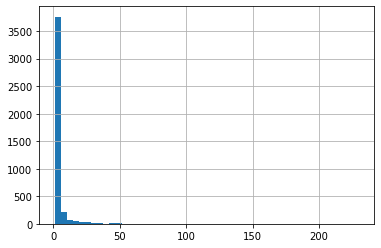

In [136]:
#Histogram of the number of poems written per author
df['author'].value_counts().hist(bins = 50)

In [137]:
#Let's print the top twenty : 
df['author'].value_counts()[:20]

Emily Dickinson                   230
johntiongchunghoo                 158
Michael Shepherd                  142
Francis Duggan                    141
Hasmukh Amathalal                 132
Dr A Celestine Raj Manohar M D    114
Aldo Kraas                        113
William Butler Yeats              108
David Harris                      107
Gajanan Mishra                    106
Herbert Nehrlich                  105
Lovina Sylvia Chidi                99
R I C B A S T A S A                95
C J Heck                           89
D+¦nall Dempsey                    85
Uriah Hamilton                     79
Robert William Service             72
Walt Whitman                       68
Robert Louis Stevenson             62
William Blake                      61
Name: author, dtype: int64

### Titles and content

<AxesSubplot:>

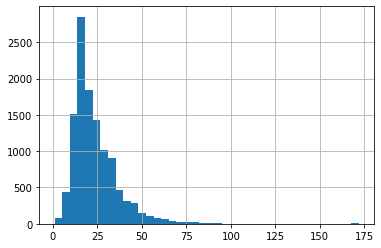

In [138]:
df.title.drop_duplicates().apply(len).hist(bins=40)

In [139]:
# let's add some basic information about the text: number of "words" (here we only split by a space, a really naive approach)
df['title_len'] = df.title.apply(lambda x: len(x.split(' ')) )
df['content_len'] = df.content.apply(lambda x: len(x.split(' ')) )

In [140]:
df

,title,author,content,theme,file_title,title_len,content_len
0,A Lonely Heart In A Thunderstorm,sylviaspencer,A lonely heart sets the table but is she a Mil...,lonely,LonelyPoemsALonelyHeartInAThunderstormPoembysy...,6,177
1,A Lonely Weekend,sylviaspencer,"How bright it is on a Friday, when I am away f...",lonely,LonelyPoemsALonelyWeekendPoembysylviaspencer.txt,3,169
2,Lonely In The Dark,nouriblack,I am living in the darkness\nI feel so scared\...,lonely,LonelyPoemsLonelyInTheDarkPoembynouriblack.txt,4,198
3,Lonely Burial,Stephen Vincent Benet,"There were not many at that lonely place,\nWhe...",lonely,LonelyPoemsLonelyBurialPoembyStephenVincentBen...,2,100
4,Filmscript For A Lonely Afternoon,Michael Shepherd,"walks into deserted playground\nindifferently,...",lonely,LonelyPoemsFilmscriptForALonelyAfternoonPoemby...,5,9
...,...,...,...,...,...,...,...
14330,War Music,Henry Van Dyke,Break off! Dance no more!\nDanger is at the do...,music,MusicPoemsWarMusicPoembyHenryVanDyke.txt,2,302
14331,Music,Rainer Maria Rilke,"Take me by the hand;\nit's so easy for you, An...",music,MusicPoemsMusicPoembyRainerMariaRilke.txt,1,51
14332,The Sound Of Music,Ravi Sathasivam,The sound of music gives us so much emotions\n...,music,MusicPoemsTheSoundOfMusicPoembyRaviSathasivam.txt,4,143
14333,Reed Music,Frederick Kesner,Amber frosted reeds\nin the summer's wind\nswa...,music,MusicPoemsReedMusicPoembyFrederickKesner.txt,2,23


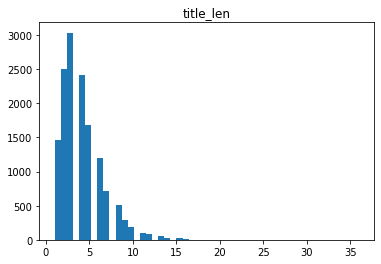

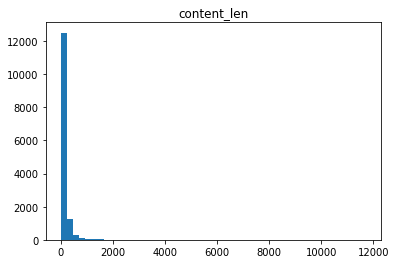

In [141]:
for col in ['title_len', 'content_len']:
    plt.figure()
    plt.title(col)
    plt.hist(df[col], bins = 50)
    plt.plot()

$\longrightarrow$ Most of the poems have less than 10 words for the title and less than 500 words for the content.